In [1]:
from model.linear_system_solver import *

### Для решения СЛУ используется метод решения при помощи LU-decomposition
Рассмотрим нашу систему: Ax = b

Заметим, что любую квадратную матрицу A можно представить в виде произведения нижне-треугольной на верхне-треугольную матрицу. Назовем эти матрицы A = LU. (От слов lower and upper)

### При помощи LU-факторизации мы можем разложить нашу матрицу A на две такие компоненты слeдующим образом:
#### Элементы верхне-треугольной матрицы U выражаются как:
<img src="images/upper.png">
#### А элементы нижне-треугольно соответственно:
<img src="images/lower.png">
Кроме того, используется перестановка строк матрицы, таким образом, чтобы максимальный элемент каждого столбца лежал на диагонали. Таким образом, мы увеличиваем элементы, которые окажутся на диагонали верхне-треугольной матрицы U, для того чтобы при подсчете матрицы L с меньшей вероятностью возникла ситуация с делением на околонулевой элемент, что могло бы сильно подпортить результаты вычислений.
###  Теперь, когда мы научились раскладывать матрицу А на произведение L и U, заметим:
Ax = b => LUx = b

Обозначим Ux = y, тогда Ly = b.

Тогда легко сначала найти y из 2 уравнения (помним, что L - нижне-треугольная, а значит можно использовать forward substitution, без необходимости искать обратную матрицу).

Затем подставим посчитанный y в первоначальное уравнение Ux = y, откуда аналогично легко посчитать x, используя backward substitution.


#### Кроме того, вспомним, что определить произведения двух квадратных матриц равен произведению их определителей, а также, что определитель треугольной матрицы равен произведению элементов на его диагонали. Тогда, используя это же разложение мы легко можем посчитать и определитель нашей матрицы A.

### Матричную норму будем использовать по строкам, то есть определим её как сумму элементов в i строке, где i - строка, в которой сумма элементов максимальна.

### Для того, чтобы посчитать числа обусловленности нам потребуется обратная матрица:
Воспользуемся определением обратной матрицы: (Для примера размера 3x3, но рассуждения обобщаются на любые квадратные матрицы)
<img src="images/inverse_definition.png">
Заметим тогда, что решив следующую систему, мы получим первый столбец обратной матрицы:
<img src="images/inv1.png">
Аналогично решая систему для [0, 1, 0] мы получим второй столбец обратной матрицы и так далее. Таким образом мы можем получить всю обратную матрицу, причем довольно быстро. Учитывая подсчитанное один раз LU разложение, каждое решение линейной системы будет требовать всего лишь O(n^2) времени.


#### Все описаннные действия реализованы в модуле model.linear_system_solver

## Теперь проведем тестирование при помощи вышеописанных методов

In [2]:
from scipy.linalg import hilbert

A = [[1, 2, 3],
     [2.0001, 3.999, 6],
     [15, 3, 6]]
b1 = [i for i in range(3)]

B = hilbert(8)
b2 = [i for i in range(8)]

C = [[10**6, 2],
     [10**13, 2]]
b3 = [i for i in range(2)]

In [3]:
s1 = solve(A, b1)
s1

[-77.36434108526058, -1007.7364341083876, 697.6124031006785]

In [4]:
s2 = solve(B, b2)
s2

[-504.00007326673949,
 31248.00364332414,
 -461160.04491112416,
 2772000.2321323603,
 -8177400.6018656185,
 12540528.825216815,
 -9585576.5717527457,
 2882880.1576387272]

In [5]:
s3 = solve(C, b3)
s3

[1.0000001000000101e-13, -5.000000500000049e-08]

### Посчитаем определители:

In [6]:
print(det(A), det(B), det(C), sep='\n')

0.03870000000000536
2.73704989336e-33
-19999998000000.0


### Посчитаем нормы:

In [7]:
print(max_abs_sum_norm(A), max_abs_sum_norm(B), max_abs_sum_norm(C), sep='\n')

24
2.71785714286
10000000000002


### Посчитаем числа обусловленности:

In [8]:
print(max_abs_sum_norm(A) * max_abs_sum_norm(inverse(A)))
print(max_abs_sum_norm(B) * max_abs_sum_norm(inverse(B)))
print(max_abs_sum_norm(C) * max_abs_sum_norm(inverse(C)))

24185.860465112924
587644.236667
5000000000001.0


### Модуль невязки решения:

In [9]:
def matrix_x_vector(A, b):
    res = []
    for i in range(len(A)):
        res.append(sum([A[i][j] * b[j] for j in range(len(A))]))
    return res

def diff(v1, v2):
    if len(v1) != len(v2):
        return None
    return [v1[i] - v2[i] for i in range(len(v1))]

def vec_norm(v):
    return sum([e * e for e in v])**0.5

In [10]:
diff1 = diff(b1, matrix_x_vector(A, s1))
print(diff1)
vec_norm(diff1)

[0.0, 0.0, 0.0]


0.0

In [11]:
diff2 = diff(b2, matrix_x_vector(B, s2))
print(diff2)
vec_norm(diff2)

[-5.8207660913467407e-11, 5.8207660913467407e-11, 5.8207660913467407e-11, -1.1641532182693481e-10, 3.2014213502407074e-10, -5.8207660913467407e-11, -2.9103830456733704e-10, 0.0]


4.6292476241322194e-10

In [12]:
diff3 = diff(b3, matrix_x_vector(C, s3))
print(diff3)
vec_norm(diff3)

[-2.6469779601696886e-23, 0.0]


2.6469779601696886e-23

#### Во всех трех случаях модуль невязки очень близок к 0. Разница между конкретными элементами не превыщает e-10, что в принципе говорит о довольно высокой точности.

## Приступим к интерполяции.
Как и предлагается в задании, будем использовать кубический сплайн дефекта 1.
По определению на отрезке [x(i), x(i+1)] сплайн будет иметь следующий вид:
<img src="images/spline.png" width='80%'>
Где h - размер шага, f(i) - известное нам значение в точке x(i). m(i) - производные в соответствующих точках.
Задача сводится к тому, чтобы найти все m(i). Для этого можно составить следующую систему линейных уравнений для каждого i = 1,2 ... n:
<img src="images/spline_m.png" width='30%'>
Кроме того, для того, чтобы число неизвестных совпало с числом уравнений, аппроксимируем граничные производные используя следующие формулы:
<img src="images/spline_constraints.png" width='30%'>
Теперь просто решим систему, используя описанные выше методы и подставим полученные значения в формулу сплайна.

#### Собственно, все описанные действия реализованы в модуле model.interpolation

In [13]:
from model import data
from model.interpolation import interpolate
from model.tabulation import save_tabulated_func

### Протестируем метод на 3 следующих функциях:

In [14]:
# гладкая
f1 = '6w * (1 - w)'
# осциллирующая
f2 = 'sin(w)'
# разрывная
f3 = lambda w: round(w)

In [15]:
def run_test(f, x0, x1, step):
    name = 'ρ(w)'
    # tabulate function and save to the file
    save_tabulated_func(name, f, x0=x0, x1=x1, step=step).join()
    # load tabulated function from file
    x, y = data.get_p_function()
    return interpolate(x, y)

In [16]:
%matplotlib inline
from matplotlib.pyplot import plot

### Гладкая функция: 6w * (1 - w)
#### отрезок [0, 1], шаг: 0.1

In [17]:
def func1(w):
    return 6 * w * (1-w)

function data/p_func.csv saved.


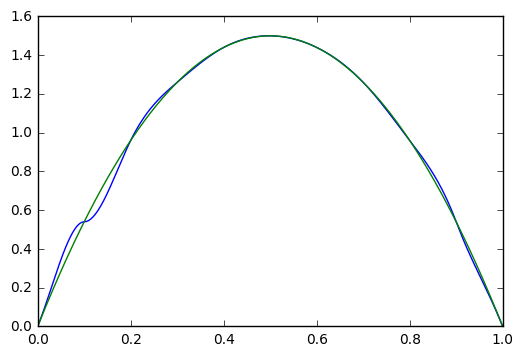

In [18]:
f = run_test(f1, 0, 1, 0.1)
plot([i * 0.001 for i in range(1000)], [f(i * 0.001) for i in range(1000)])
plot([i * 0.001 for i in range(1000)], [func1(i * 0.001) for i in range(1000)])

#### отрезок [0, 1], шаг: 0.25

function data/p_func.csv saved.


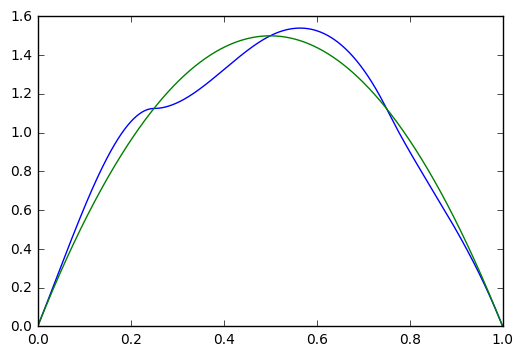

In [19]:
f = run_test(f1, 0, 1, 0.25)
plot([i * 0.001 for i in range(1000)], [f(i * 0.001) for i in range(1000)])
plot([i * 0.001 for i in range(1000)], [func1(i * 0.001) for i in range(1000)])

#### График разности значений c сеткой 1:
Можно заметить, что наибольшая ошибка всегда находится рядом с границами сплайна. Это происходит из-за того, что мы аппроксиммируем производные в граничных точках, а не считаем их. При этом, в остальных местах функция аппроксимируется вообще безошибочно, т.к. функция является полиномом всего лишь 2 степени.

function data/p_func.csv saved.


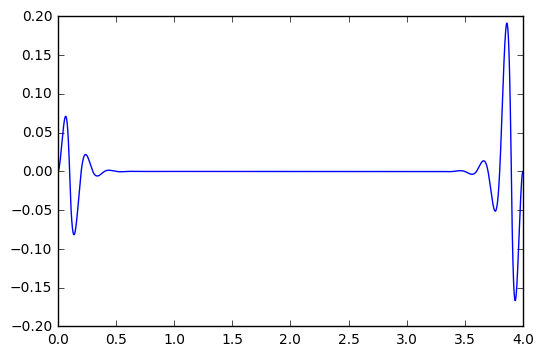

In [20]:
f = run_test(f1, 0, 4, 0.1)
plot([i * 0.001 for i in range(4000)], [f(i * 0.001) - func1(i * 0.001) for i in range(4000)])

### Осциллирующая функция: sin(w)
#### отрезок [-4, 4], шаг: 1

In [21]:
import math
def func2(w):
    return math.sin(w)

function data/p_func.csv saved.


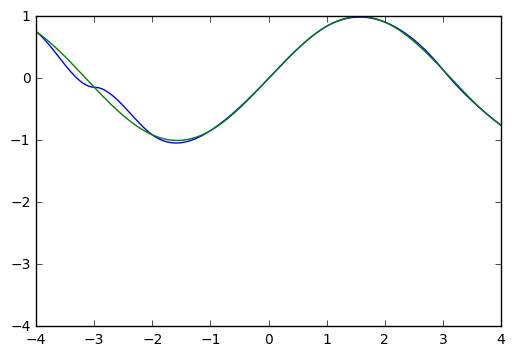

In [22]:
f = run_test(f2, -4, 4, 1)
plot([i * 0.001 for i in range(-4000, 4000)], [f(i * 0.001) for i in range(-4000, 4000)])
plot([i * 0.001 for i in range(-4000, 4000)], [func2(i * 0.001) for i in range(-4000, 4000)])

#### отрезок [-4, 4], шаг: 2

function data/p_func.csv saved.


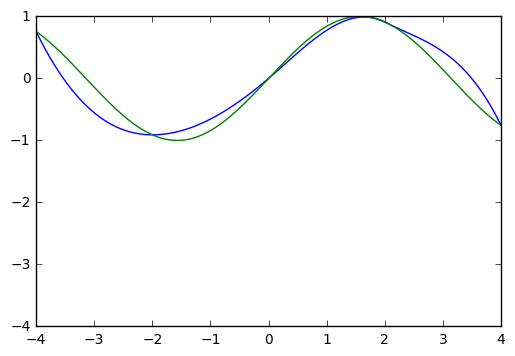

In [23]:
f = run_test(f2, -4, 4, 2)
plot([i * 0.001 for i in range(-4000, 4000)], [f(i * 0.001) for i in range(-4000, 4000)])
plot([i * 0.001 for i in range(-4000, 4000)], [func2(i * 0.001) for i in range(-4000, 4000)])

#### График разности значений c сеткой 1:
Можно заметить, что наибольшая ошибка всегда находится рядом с границами сплайна. Это происходит из-за того, что мы аппроксиммируем производные в граничных точках, а не считаем их.

function data/p_func.csv saved.


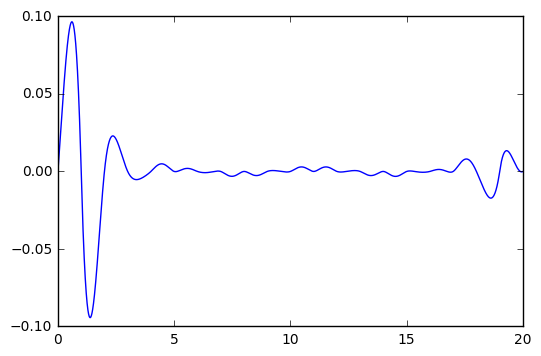

In [24]:
f = run_test(f2, 0, 20, 1)
plot([i * 0.001 for i in range(20000)], [f(i * 0.001) - func2(i * 0.001) for i in range(20000)])

### Разрывная функция: round(w)
#### отрезок [0, 3], шаг: 0.05

function data/p_func.csv saved.


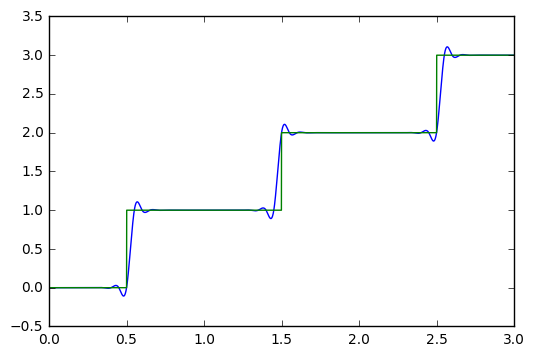

In [25]:
f = run_test(f3, 0, 3, 0.05)
plot([i * 0.001 for i in range(3000)], [f(i * 0.001) for i in range(3000)])
plot([i * 0.001 for i in range(3000)], [f3(i * 0.001) for i in range(3000)])

#### отрезок [0, 3], шаг: 0.2

function data/p_func.csv saved.


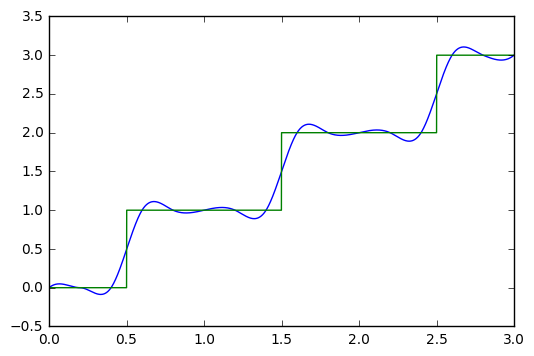

In [26]:
f = run_test(f3, 0, 3, 0.2)
plot([i * 0.001 for i in range(3000)], [f(i * 0.001) for i in range(3000)])
plot([i * 0.001 for i in range(3000)], [f3(i * 0.001) for i in range(3000)])

#### График разности значений c сеткой 0.05:
Здесь, по понятным причинам ошибка возникает рядом с разрывами, т.к. мы пытаемся гладкой функцией аппроксимировать разрывную, максимальная ошибка оказывается равной 'высоте' разрыва, т.е. разности y(i + eps) - y(i - eps) в точке разрыва. (1 в нашем случае)

function data/p_func.csv saved.


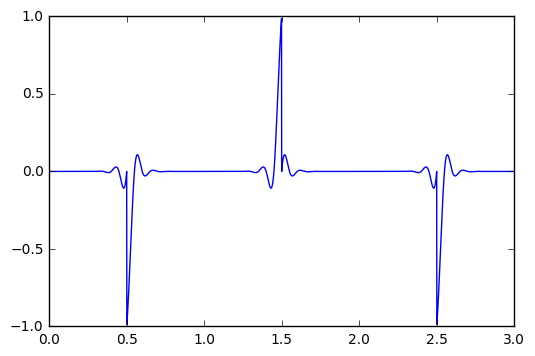

In [27]:
f = run_test(f3, 0, 3, 0.05)
plot([i * 0.001 for i in range(3000)], [f(i * 0.001) - f3(i * 0.001) for i in range(3000)])